# Análisis Exploratorio de Datos

### Importar datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    unique_val = data.nunique()
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([unique_val, zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: 'Unique Values', 1: 'Zero Values', 2: 'Missing Values', 3: '% of Total Values'})
    mz_table['Total Zero / Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero / Missing Values'] = 100 * mz_table['Total Zero / Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    # This shows only the zero value rows
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
                                                                                                   "There are " + str(
        mz_table.shape[0]) +
          " columns that have missing values.")
    return mz_table

def normalize_data(df,column,replaced,replacement):
    for i in column: df[i] = df[i].replace(
                        to_replace=[replaced],
                        value=[replacement])


############################ START CODE ######################################

# Import Data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',
                   converters={'SeniorCitizen': lambda x: pd.to_numeric(x, errors='coerce'),
                                'tenure': lambda x: pd.to_numeric(x, errors='coerce'),
                                'MonthlyCharges': lambda x: pd.to_numeric(x, errors='coerce'),
                               'TotalCharges': lambda x: pd.to_numeric(x, errors='coerce'),
                               })

# Normalize values to Yes / No
normalize_data(df, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 'No internet service', 'No')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Explorar datos

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [8]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

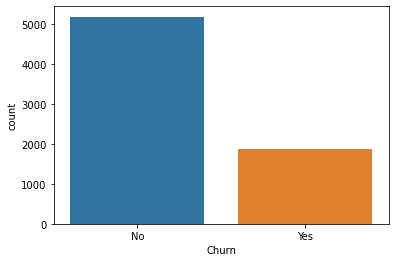

In [10]:
import seaborn as sns
sns.countplot(data=df, x=df.Churn)

In [11]:
df_null=df.isnull().sum()

In [12]:
df_null

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df_null=df.isnull().sum()

In [15]:
df_null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [17]:
df['Target'] = [1 if x == 'Yes' else 0 for x in df['Churn']]

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Target
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [19]:
df['Target'].value_counts() #26,57% bad rate

0    5163
1    1869
Name: Target, dtype: int64

In [20]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Target
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Target,0.150541,-0.354049,0.192858,-0.199484,1.000000


In [21]:
df2=pd.get_dummies(df,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [22]:
df2.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Target,gender_Female,gender_Male,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:ylabel='Frequency'>

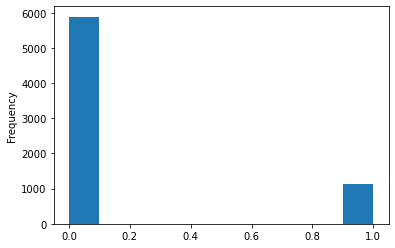

In [23]:
df2['SeniorCitizen'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

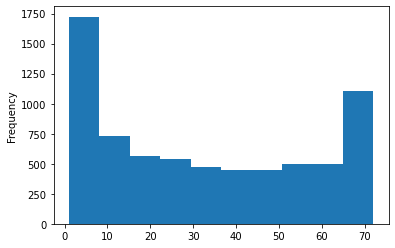

In [24]:
df2['tenure'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

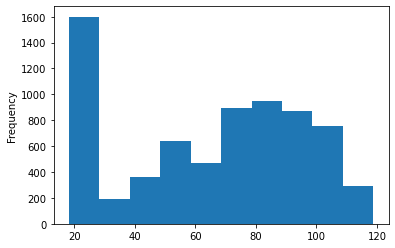

In [25]:
df2['MonthlyCharges'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

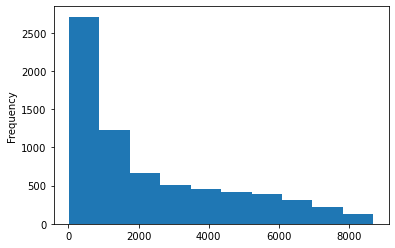

In [26]:
df2['TotalCharges'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

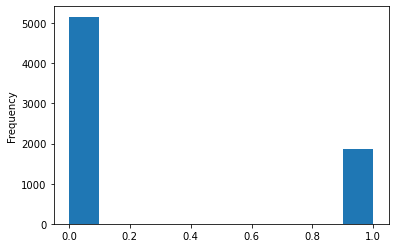

In [27]:
df2['Target'].plot.hist()

In [28]:
df2.dtypes

customerID                                  object
SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
Target                                       int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [29]:
df2=df2.drop(['customerID','Churn'], axis=1)

In [30]:
df2.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Target                                       int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [31]:
X = df2.loc[:, df2.columns != 'Target']
y = df2.loc[:, df2.columns == 'Target']

In [32]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [33]:
y.shape

(7032, 1)

### SMOTE para clases imbalanceadas

In [34]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\patricio\anaconda3\envs\ia\lib\site-packages (0.7.0)


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [37]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
columns = X_train.columns

In [38]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])
# we can Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of no bads in oversampled data",len(os_data_y[os_data_y['Target']==0]))
print("Number of bads",len(os_data_y[os_data_y['Target']==1]))
print("Proportion of no bads data in oversampled data is ",len(os_data_y[os_data_y['Target']==0])/len(os_data_X))
print("Proportion of bads data in oversampled data is ",len(os_data_y[os_data_y['Target']==1])/len(os_data_X))

Length of oversampled data is  7228
Number of no bads in oversampled data 3614
Number of bads 3614
Proportion of no bads data in oversampled data is  0.5
Proportion of bads data in oversampled data is  0.5


### Seleccion de Variables por RFE

In [39]:
data_final_vars=df2.columns.values.tolist()
y=['Target']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [40]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Patricio\anaconda3\envs\ia\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Patricio\anaconda3\envs\ia\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Patricio\anaconda3\envs\ia\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

[False False False False  True  True  True  True  True  True False False
 False False False False False False False False  True  True  True  True
  True  True False False False False False  True  True  True  True  True
  True  True  True]
[16 17 12 20  1  1  1  1  1  1  7 14  6 10  5 19  4  8 15  9  1  1  1  1
  1  1 13 11  2  3 18  1  1  1  1  1  1  1  1]


In [41]:
df2.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Target', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [42]:
cols=['gender_Female','gender_Male','Partner_No','Partner_Yes','Dependents_No','Dependents_Yes','OnlineSecurity_No',
      'OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_Yes',
      'Contract_One year','Contract_Two year','PaperlessBilling_No','PaperlessBilling_Yes','PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)',	'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check']

In [43]:
X=os_data_X[cols]
y=os_data_y['Target']

In [44]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.447003
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.355    
Dependent Variable:         Target                   AIC:                      6501.8779
Date:                       2020-10-13 12:09         BIC:                      6639.5923
No. Observations:           7228                     Log-Likelihood:           -3230.9  
Df Model:                   19                       LL-Null:                  -5010.1  
Df Residuals:               7208                     LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [45]:
cols=['Partner_No',	'Partner_Yes',	'Dependents_No',	'OnlineSecurity_No',	'OnlineBackup_No',	'DeviceProtection_No',	'DeviceProtection_Yes',	'Contract_One year',	'Contract_Two year',	'PaperlessBilling_Yes',	'PaymentMethod_Bank transfer (automatic)',	'PaymentMethod_Credit card (automatic)',	'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check'] 
X=os_data_X[cols]
X_test=X_test[cols]
y=os_data_y['Target']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.450913
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.349    
Dependent Variable:         Target                   AIC:                      6546.4018
Date:                       2020-10-13 12:09         BIC:                      6642.8019
No. Observations:           7228                     Log-Likelihood:           -3259.2  
Df Model:                   13                       LL-Null:                  -5010.1  
Df Residuals:               7214                     LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [46]:
X.head()

,Partner_No,Partner_Yes,Dependents_No,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,DeviceProtection_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,0,1,0,1,1,0,1,0,0
1,1,0,1,0,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,1,1,0,1,0,0,0,0,0,1
3,0,1,1,0,1,0,1,0,1,1,0,1,0,0
4,0,1,1,1,1,0,1,0,0,1,0,0,1,0


In [47]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

In [48]:
X.to_csv("DF_Cols.csv")

In [49]:
y.to_csv("DF_Target.csv")

In [50]:
X_test.to_csv("DF_Cols_Test.csv")

In [51]:
y_test.to_csv("DF_Target_Test.csv")